In [25]:
import numpy as np
import xarray as xr
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

%matplotlib inline
plt.rcParams['image.cmap'] = 'Paired'
#sns.set(font_scale=2)

In [26]:
# Parent directory for the results of this run
group_results_directory = '/data/jpetrie/MEOPAR/SalishSea/results/remin_comparison/'
tracer_file = 'SS5x5_1h_20150201_20150501_ptrc_T.nc'
individual_directories = []
param_vals = []
for file in os.listdir(group_results_directory):
    if file.startswith("NH_"):
        val = float(file.split("NH_")[1])
        individual_directories.append(file)
        param_vals.append(val)


tracer_datasets = [xr.open_dataset(group_results_directory + '/' + file +'/' + tracer_file) for file in individual_directories]
dataset_dict = dict(zip(param_vals, tracer_datasets))

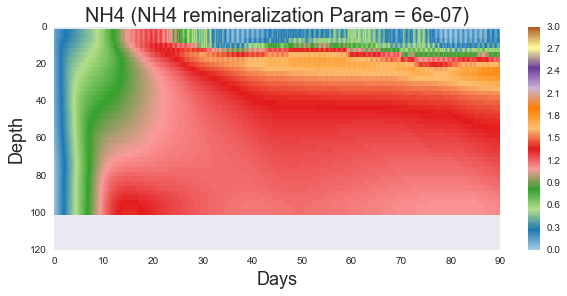

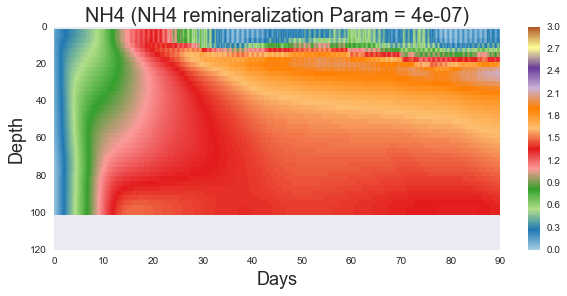

In [27]:
# Plot depth/time/PHY heatmap for each value of alpha
for NH_remin_const in dataset_dict:
    z = dataset_dict[NH_remin_const].deptht.values
    t= np.array([float(x) for x in dataset_dict[NH_remin_const].time_centered.values])
    tz,zt=np.meshgrid((t[:] - t[0])/10**9/3600/24,z[:])
    
    fig, ax = plt.subplots(1, 1,figsize=(10,4))
    mesh=plt.pcolormesh(tz,zt,dataset_dict[NH_remin_const].NH4.values[:,:,2,2].T, vmin = 0, vmax = 3)
    fig.colorbar(mesh)
    plt.gca().invert_yaxis()
    plt.title("NH4 (NH4 remineralization Param = " + str(NH_remin_const)+")", size = 20)
    plt.xlabel("Days", size =18)
    plt.ylabel("Depth", size = 18)

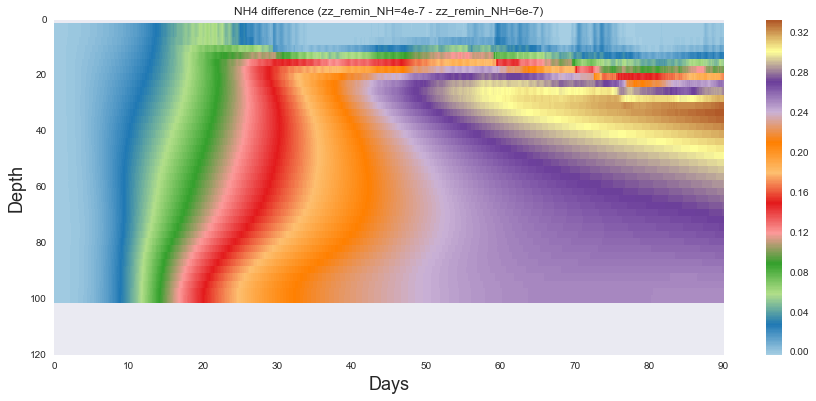

In [28]:
# Plot the difference in NH4 concentration vs depth and time
fig, ax = plt.subplots(1, 1,figsize=(15,6))
mesh=plt.pcolormesh(tz,zt,dataset_dict[4e-7].NH4.values[:,:,2,2].T - dataset_dict[6e-7].NH4.values[:,:,2,2].T)
fig.colorbar(mesh)
plt.gca().invert_yaxis()
plt.xlabel("Days", size =18)
plt.ylabel("Depth", size = 18)
plt.title("NH4 difference (zz_remin_NH=4e-7 - zz_remin_NH=6e-7)")

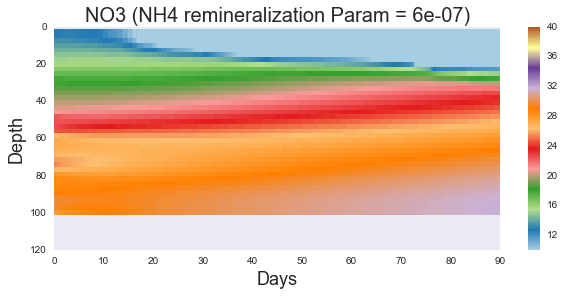

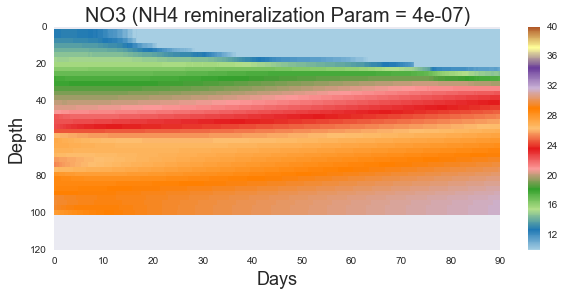

In [29]:
# Plot depth/time/NO3 heatmap for each value
for NH_remin_const in dataset_dict:
    z = dataset_dict[NH_remin_const].deptht.values
    t= np.array([float(x) for x in dataset_dict[NH_remin_const].time_centered.values])
    tz,zt=np.meshgrid((t[:] - t[0])/10**9/3600/24,z[:])
    
    fig, ax = plt.subplots(1, 1,figsize=(10,4))
    mesh=plt.pcolormesh(tz,zt,dataset_dict[NH_remin_const].NO3.values[:,:,2,2].T, vmin = 10, vmax = 40)
    fig.colorbar(mesh)
    plt.gca().invert_yaxis()
    plt.title("NO3 (NH4 remineralization Param = " + str(NH_remin_const)+")", size = 20)
    plt.xlabel("Days", size =18)
    plt.ylabel("Depth", size = 18)

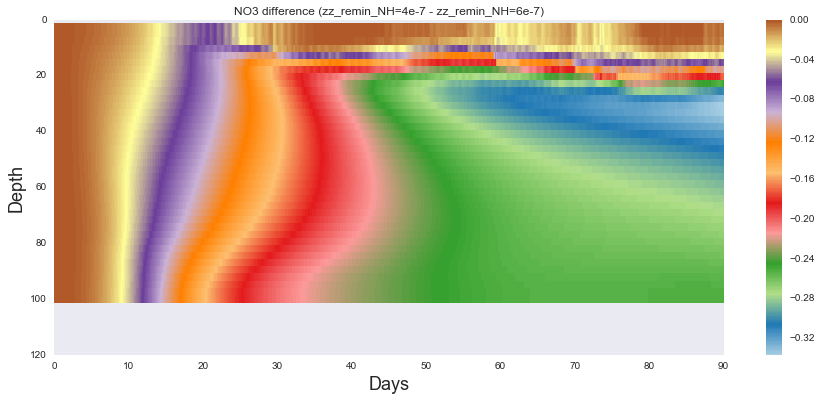

In [30]:
# Plot the difference in NO3 concentration vs depth and time
fig, ax = plt.subplots(1, 1,figsize=(15,6))
mesh=plt.pcolormesh(tz,zt,dataset_dict[4e-7].NO3.values[:,:,2,2].T - dataset_dict[6e-7].NO3.values[:,:,2,2].T)
fig.colorbar(mesh)
plt.gca().invert_yaxis()
plt.xlabel("Days", size =18)
plt.ylabel("Depth", size = 18)
plt.title("NO3 difference (zz_remin_NH=4e-7 - zz_remin_NH=6e-7)")

In [31]:
# Convert list of xarrays to a single pandas dataframe. Easier to manipulate and plot
dataframe_list = []
for NH_remin_const in dataset_dict:
    df = dataset_dict[NH_remin_const].to_dataframe()
    df['NH_CONST'] = NH_remin_const
    dataframe_list.append(df)

df = pd.concat(dataframe_list)

df_subset = df.query('x == 2 and y == 2 and axis_nbounds == 0') # Subset for certain grids of the 5x5
df_subset.reset_index(inplace=True) # Get rid of that multiindex madness

In [32]:
# Create a dataframe with depth averaged tracer values. If all grid heights are the same this is the mean value

depth_averaged = df_subset.groupby(['time_counter','NH_CONST','x','y']).mean()
depth_averaged.reset_index(inplace=True)

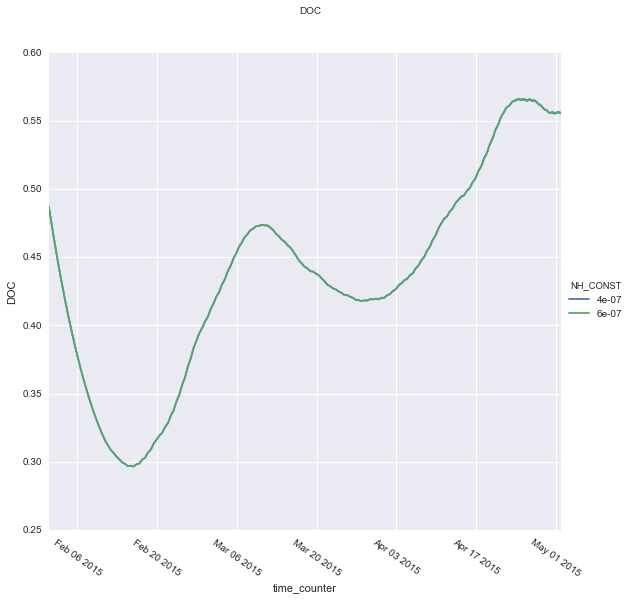

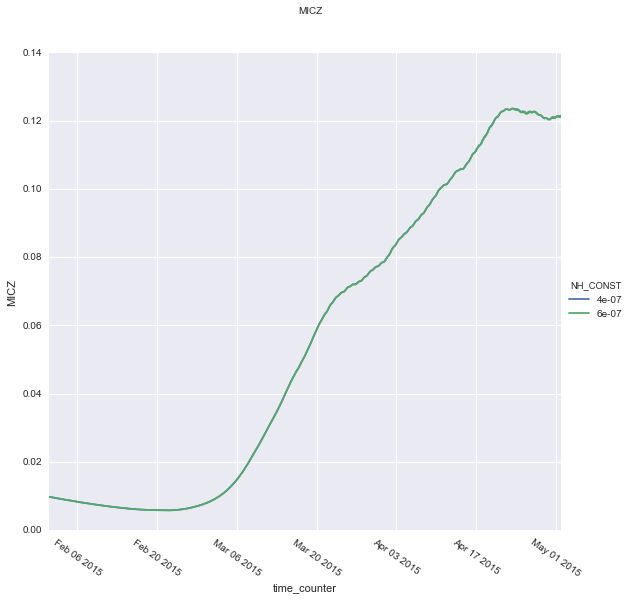

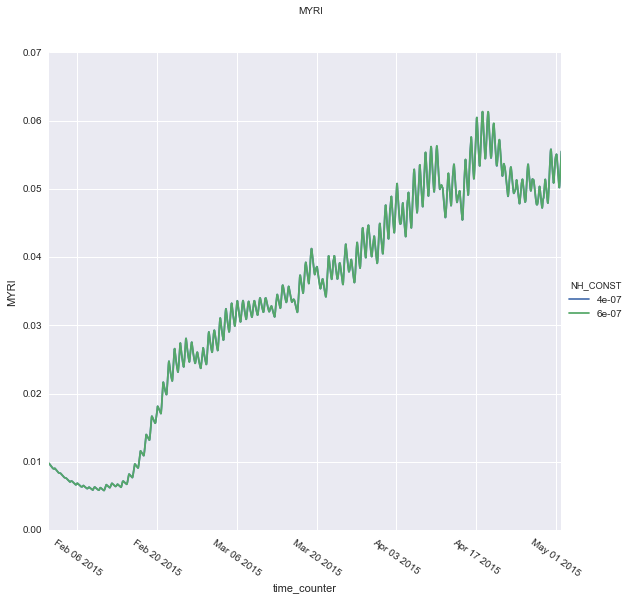

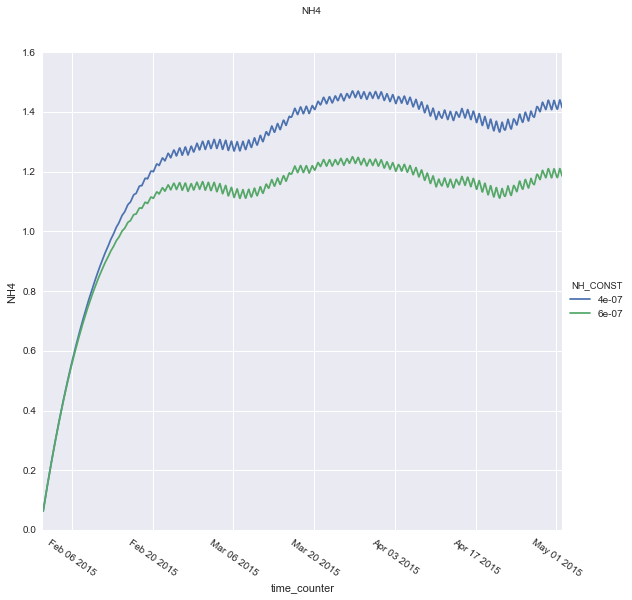

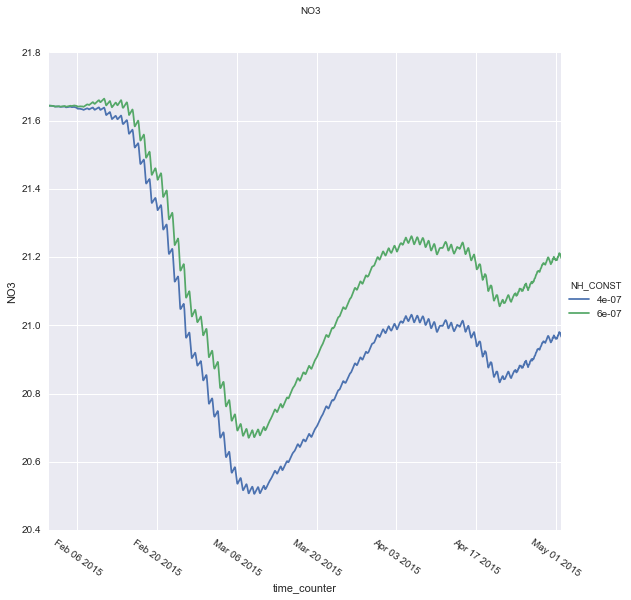

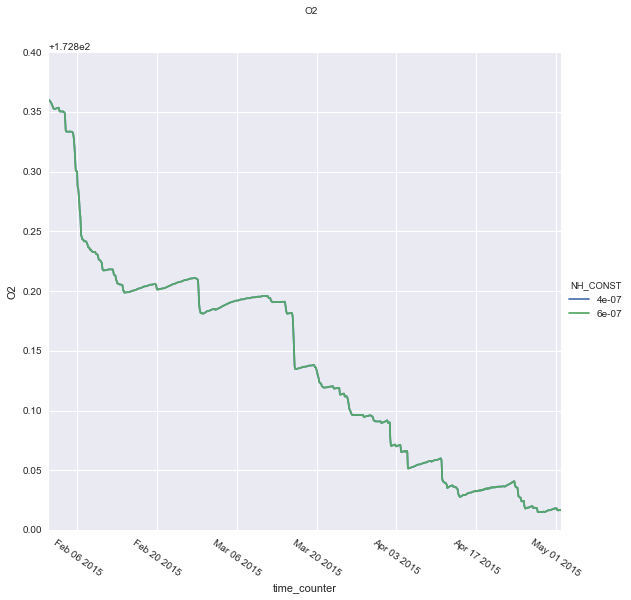

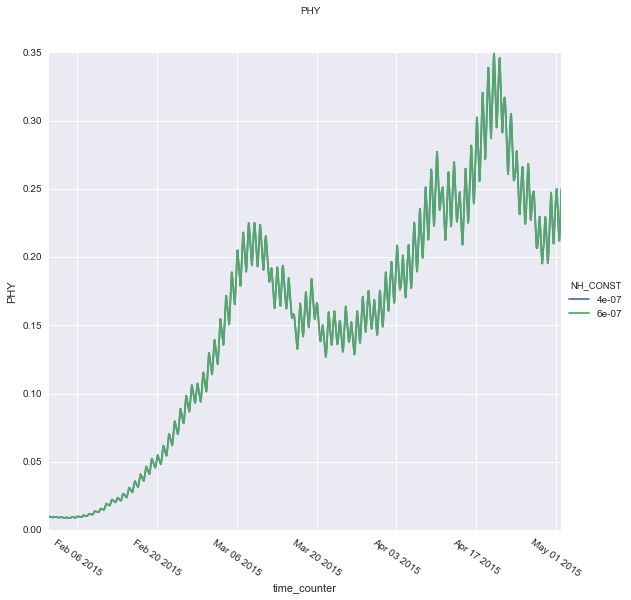

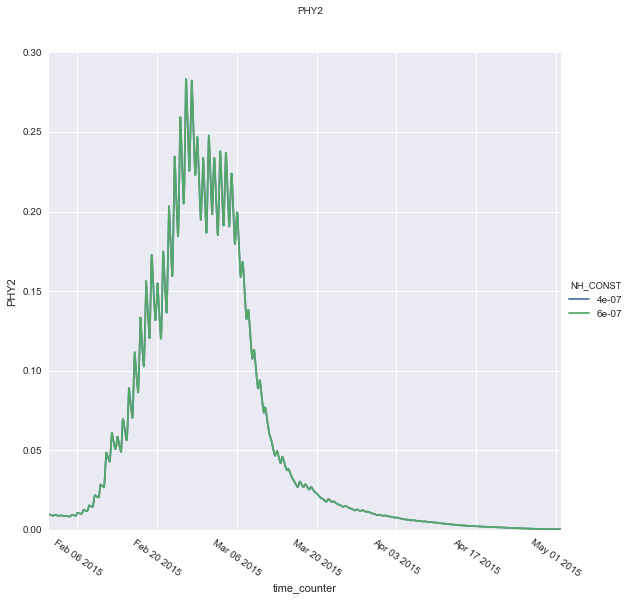

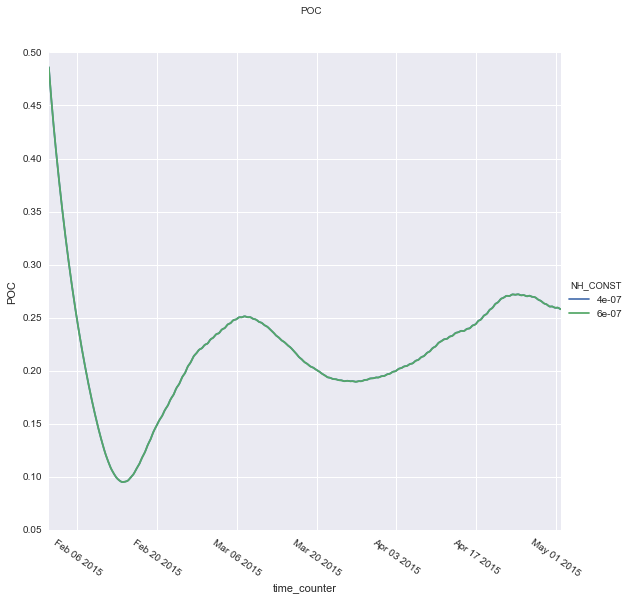

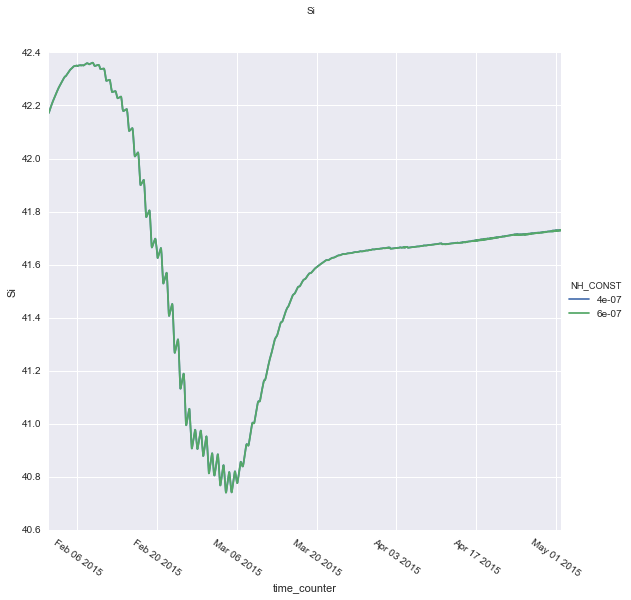

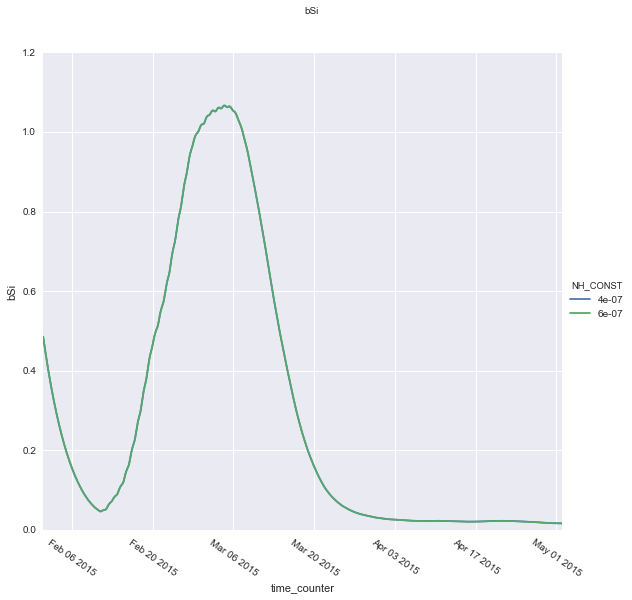

In [33]:
plot_vars = [ 'DOC','MICZ', 'MYRI', 'NH4', 'NO3', 'O2', 'PHY', 'PHY2', 'POC', 'Si', 'bSi']

for var in plot_vars:
    fg = sns.FacetGrid(data=depth_averaged, hue='NH_CONST',size =8)
    fg.map(plt.plot, 'time_counter', var).add_legend()
    fg.set_xticklabels(rotation=-35)
    plt.subplots_adjust(top=0.9)
    fg.fig.suptitle(var)